In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('imdb_top_2000_movies.csv')

In [90]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [92]:
df.shape

(2000, 10)

## Prepping the data
### Removing NAN values

In [93]:
df.isna().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [94]:
df.dropna(subset= 'Gross', axis= 0, inplace= True)

In [95]:
df.shape

(1903, 10)

In [96]:
df.isna().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       33
Votes            0
Genre            0
Director         0
Cast             0
Gross            0
dtype: int64

### Correcting Year Column

In [97]:
df = df[df['Release Year'].astype(str).apply(len) == 4]

In [98]:
df.shape

(1842, 10)

### Correcting Data Format

In [99]:
df['Votes'] = df['Votes'].str.replace(',', '').astype('int')

In [100]:
df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '').astype('float') * 100000

In [101]:
df[['Release Year']] = df[['Release Year']].astype('int')


In [85]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,13497000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,5730000.0
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,5480000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,4482000.0
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,13209000.0


### Getting the Movie Counts from each Decade

In [102]:
df['Decade'] = df['Release Year'].apply(lambda x: f"'{str(x)[2:3]}0s")


df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Decade
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,13497000.0,'70s
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,5730000.0,'70s
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,5480000.0,'80s
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,4482000.0,'60s
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,13209000.0,'70s


In [109]:
decade_counts = df['Decade'].value_counts().sort_index().reset_index()
decade_counts.columns = ['Decade' ,'Count']

decade_counts

,Decade,Count
0,'00s,960
1,'10s,54
2,'20s,4
3,'30s,10
4,'40s,12
5,'50s,27
6,'60s,54
7,'70s,75
8,'80s,207
9,'90s,439


Text(0.5, 0, 'Decades')

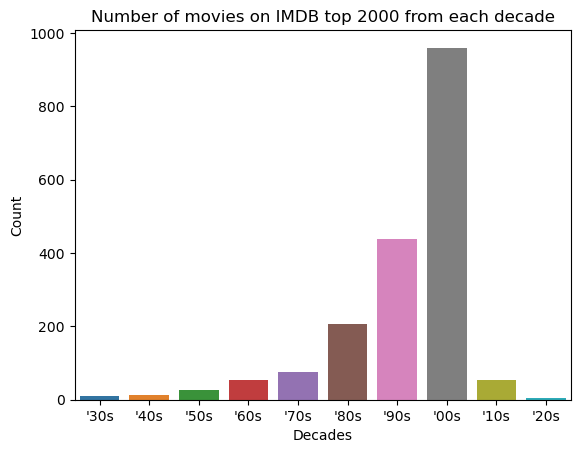

In [111]:
sns.barplot(x='Decade', y= 'Count', data=decade_counts, 
    order=['\'30s', '\'40s', '\'50s', '\'60s', '\'70s', '\'80s', '\'90s', '\'00s', '\'10s', '\'20s'])
plt.title('Number of movies on IMDB top 2000 from each decade')
plt.xlabel('Decades')

### Directors with the most amount of movies

In [113]:
director_counts = df['Director'].value_counts()
director_counts.head(3)

Director
Steven Spielberg    22
Ridley Scott        14
Clint Eastwood      13
Name: count, dtype: int64

In [114]:
spielberg_movies = df[df['Director'] == 'Steven Spielberg']
spielberg_movies

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Decade
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,13209000.0,'70s
50,Jaws,1975,124,8.1,87.0,656761,"Adventure, Mystery, Thriller",Steven Spielberg,Roy Scheider,26000000.0,'70s
73,Raiders of the Lost Ark,1981,115,8.4,86.0,1033883,"Action, Adventure",Steven Spielberg,Harrison Ford,24816000.0,'80s
334,Indiana Jones and the Last Crusade,1989,127,8.2,65.0,808466,"Action, Adventure",Steven Spielberg,Harrison Ford,19717000.0,'80s
339,Empire of the Sun,1987,153,7.7,62.0,133909,"Drama, War",Steven Spielberg,Christian Bale,2224000.0,'80s
350,E.T. the Extra-Terrestrial,1982,115,7.9,92.0,435984,"Adventure, Family, Sci-Fi",Steven Spielberg,Henry Thomas,43511000.0,'80s
424,Always,1989,122,6.4,50.0,32712,"Drama, Fantasy, Romance",Steven Spielberg,Richard Dreyfuss,4386000.0,'80s
427,Hook,1991,142,6.8,52.0,272416,"Adventure, Comedy, Family",Steven Spielberg,Dustin Hoffman,11965000.0,'90s
430,Indiana Jones and the Temple of Doom,1984,118,7.5,57.0,533755,"Action, Adventure",Steven Spielberg,Harrison Ford,17987000.0,'80s
451,The Color Purple,1985,154,7.7,78.0,96890,Drama,Steven Spielberg,Danny Glover,9847000.0,'80s


In [115]:
average_spielberg = df[df['Director'] == 'Steven Spielberg']['IMDB Rating'].mean()
average_scott = df[df['Director'] == 'Ridley Scott']['IMDB Rating'].mean()
average_eastwood = df[df['Director'] == 'Clint Eastwood']['IMDB Rating'].mean()

print(f"Average IMDB rating for movies directed by Steven Speilberg: {average_spielberg}")
print(f"Average IMDB rating for movies directed by Ridley Scott: {average_scott}")
print(f"Average IMDB rating for movies directed by Clint Eastwood: {average_eastwood}")

Average IMDB rating for movies directed by Steven Speilberg: 7.563636363636363
Average IMDB rating for movies directed by Ridley Scott: 7.314285714285714
Average IMDB rating for movies directed by Clint Eastwood: 7.499999999999999


### Relationship between IMDB scores and gross

<Axes: xlabel='IMDB Rating', ylabel='Gross'>

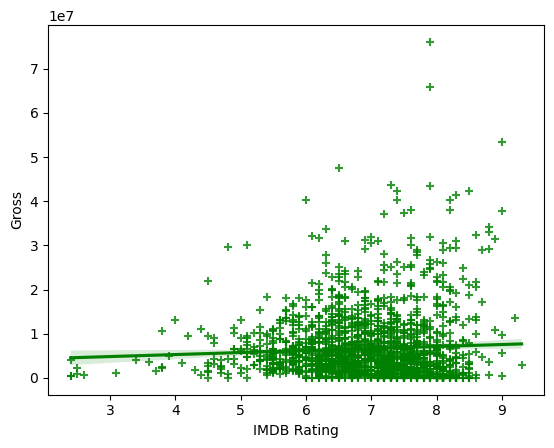

In [118]:
sns.regplot(x='IMDB Rating', y= 'Gross', data= df, color='green', marker= '+')

### Gross and release year

<Axes: xlabel='Release Year', ylabel='Gross'>

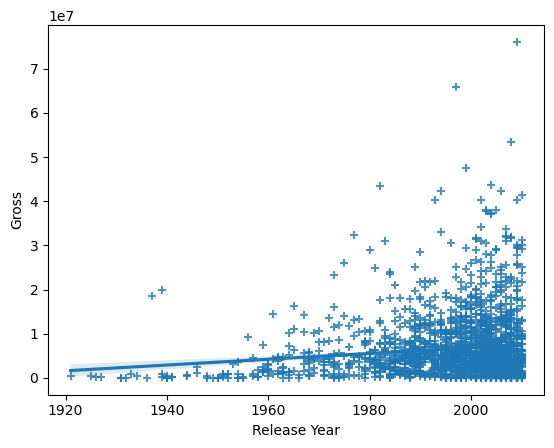

In [120]:
sns.regplot(x='Release Year', y= 'Gross', data= df, marker= '+')

### Top 10 Movies by Gross

Text(0.5, 1.0, 'Top 10 Movies by Gross')

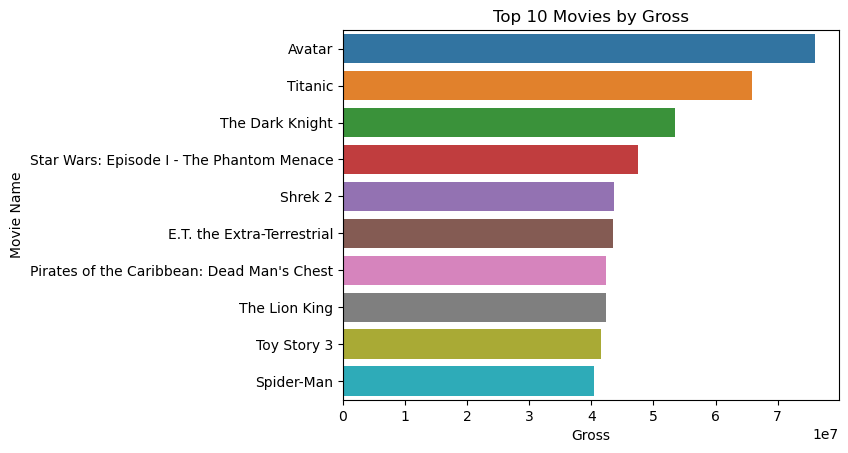

In [122]:
data = df.sort_values(by= 'Gross', ascending= False, ignore_index=True)
data = data[['Movie Name', 'Gross']].head(10)
sns.barplot(y='Movie Name', x= 'Gross', data= data)
plt.title('Top 10 Movies by Gross')